Copyright (c) 2020 Juergen Koefinger, Max Planck Institute of Biophysics, Frankfurt am Main, Germany

Released under the MIT Licence, see the file LICENSE.txt.

# Descripton

**Perform the $h$, $h^\pm$, $(\chi^2,h)$, and $(\chi^2,h^\pm)$ statistical tests.**

The input are the **normalized residuals**, which are read from a file. 

If no input is provided, you can perfrom the statistical tests for the true mode (i.e., without noise, all residuals are zero) as a check for consistency. 

# Initialization

In [1]:
# Plotting
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16) 
# numpy and scipy
import numpy as np
import scipy
from scipy.stats import chi2
# hplusminus
import sys
sys.path.append("../")
import hplusminus as hpm

In [3]:
# Parameters for gamma distribution used to calcualte p-values
gamma_param=hpm.init(gamma_params_ipath="../gamma_spline_parameters/")

# Read in normalized residuals (residuals divided by standard errors of the mean)

For uncorrelated Gaussian errors, the **residuals $r_i$** are distributed accorrding to $\propto \exp{-r_i^2/(2 \sigma_i^2)}$. The  residuals $r_i$ are given by the difference between model value $f_i$ and the data value $d_i$, i.e., $r_i=f_i-d_i$. The normalized residuals are given by 
\begin{equation}
z_i = \frac{r_i}{\sigma_i}
\end{equation}
We consider ordered data, with the index $i=1, \ldots, N$ determining the order.

In [8]:
i_path="../examples/"

In [9]:
# Name of file containing normalized residuals. REPLACE WITH YOUR OWN! 
file_name=i_path+"./true_model_normalized_residuals.txt"
file_name=i_path+"./alternative_model_normalized_residuals.txt"
#Set file_name="" and set number of data points to use true model. 
#file_name=""
#number_data_points=500

In [10]:
if file_name=="":
    # Generate normalized residuals by drawing residuals from a normal distribution for TESTING
    try:
        print("Generating residuals for true model")
        print("number_data_points = %d" % number_data_points)
    except:
        print("Error: Set positive integer value for number_data_points")
    normalized_residuals = np.random.normal(0, 1, number_data_points)
    np.savetxt(io_path+"normalized_residuals.txt", normalized_residuals)
else:
    # Loading normalized residuals (residuals divided by standard errors of the mean) from file 
    print("Loading residuals from \"%s\"" % file_name)
    normalized_residuals=np.loadtxt(file_name)
    number_data_points=len(normalized_residuals)

Loading residuals from "../examples/./alternative_model_normalized_residuals.txt"


## Plotting the normalized residuals

Text(0, 0.5, 'normalized residuals $r_i/\\sigma_i$')

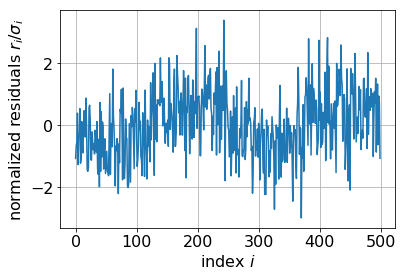

In [11]:
plt.plot(normalized_residuals)
plt.grid()
plt.xlabel("index $i$")
plt.ylabel("normalized residuals $r_i/\sigma_i$")

# Evaluate statistical tests 

In [12]:
signs=np.sign(normalized_residuals)
chi_square=(normalized_residuals**2).sum()

## Plotting the signs of the residuals

Text(0, 0.5, 'signs $s_i$')

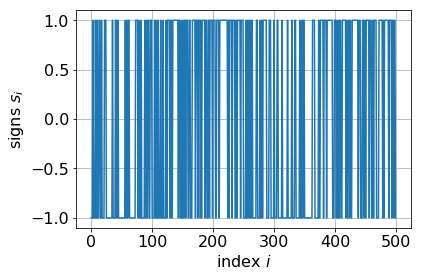

In [13]:
plt.plot(signs)
plt.grid()
plt.xlabel("index $i$")
plt.ylabel("signs $s_i$")

In [15]:
# Calculate run-length histograms
num, blockLen, histo, edges = hpm.get_run_length_distributions(signs)

In [16]:
# Dictionary for Shannon information for various tests
I={}
# Dictionary for p-values for various tests
p_value={}

## $\chi^2$-test

In [18]:
I['chi2']=hpm.SI_chi2(chi_square, number_data_points)

In [12]:
print("Shannon information = %3.2f" % I['chi2'])

Shannon information = 6.49


In [19]:
p_value['chi2']=hpm.get_p_value(I['chi2'], number_data_points, 'chi2', gamma_param)

In [14]:
print("p-value = %3.2e" % p_value['chi2'])

p-value = 3.97e-02


## $h^\pm$-test

In [20]:
I['hpm']=hpm.SI_hpm(number_data_points, num[1], histo['plus'], histo['minus'])

In [16]:
print("Shannon information = %3.2f" % I['hpm'])

Shannon information = 55.53


In [21]:
p_value['hpm']=hpm.get_p_value(I['hpm'], number_data_points, 'hpm', gamma_param)

In [22]:
print("p-value = %3.2e" % p_value['hpm'])

p-value = 1.25e-06


## $h$-test

In [23]:
I['h']=hpm.SI_h(number_data_points, histo['all'])

In [20]:
print("Shannon information = %3.2f" % I['h'])

Shannon information = 40.96


In [24]:
p_value['h']=hpm.get_p_value(I['h'], number_data_points, 'h', gamma_param)

In [25]:
print("p-value = %3.2e" % p_value['h'])

p-value = 6.31e-07


## $(\chi^2, h)$-test

In [26]:
I['chi2_h'] = I['h'] + I['chi2']

In [27]:
print("Shannon information = %3.2f" % I['chi2_h'])

Shannon information = 47.44


In [29]:
p_value['chi2_h']=hpm.get_p_value(I['chi2_h'], number_data_points, 'chi2_h', gamma_param)

In [26]:
print("p-value = %3.2e" % p_value['chi2_h'])

p-value = 2.25e-07


## $(\chi^2, h^\pm)$-test

In [31]:
I['chi2_hpm'] = I['hpm'] + I['chi2']

In [32]:
print("Shannon information = %3.2f" % I['chi2_hpm'])

Shannon information = 62.01


In [33]:
p_value['chi2_hpm']=hpm.get_p_value(I['chi2_hpm'], number_data_points, 'chi2_hpm', gamma_param)

In [34]:
print("p-value = %3.2e" % p_value['chi2_hpm'] )

p-value = 5.59e-07


# Plotting the p-values

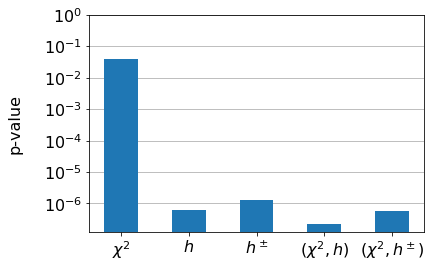

In [35]:
fig = plt.figure()
ax=plt.gca()
ax.minorticks_on()
ax.tick_params(axis='y', which='minor', right=False)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.bar([r"$\chi^2$", r"$h$", r"$h^\pm$", r"$(\chi^2, h)$", r"$(\chi^2, h^\pm)$", ], 
       [p_value['chi2'],  p_value['h'] ,  p_value['hpm'] ,p_value['chi2_h'] , p_value['chi2_hpm'] ], 
       0.5, zorder=100)
ax.set_yscale('log')
ax.set_ylabel("p-value")
ax.yaxis.set_label_coords(-0.2, 0.5)
ax.set_yticks([1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
ax.yaxis.grid() 